In [31]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date, timedelta
import mysql.connector
from mysql.connector import Error
import matplotlib as mpl
import matplotlib.pyplot as plt

In [32]:
from machine_statistics import MachineStatistics

In [33]:
ms = MachineStatistics()

In [34]:
date_in = '2021-03-15 14:00:00'
date_out = str(ms.today) + ' 23:59:59'

In [60]:
df1_sensors = ms.read_database(date_in, date_out, id_num=14)
df1_scaner = ms.read_database(date_in, date_out, id_num=4)

In [36]:
def compare_dates(df_sensors, df_scaner):
    df1_date_delta = df_sensors.date.max() - df_sensors.date.min()
    df2_date_delta = df_scaner.date.max() - df_scaner.date.min()
    return [df1_date_delta.seconds, df2_date_delta.seconds]
def compare_dates_plot():
    lst = []
    for i,j in [(1,11),(4,14),(5,15),(6,16)]:
        df1 = ms.read_database(date_in, date_out, id_num=j)
        df2 = ms.read_database(date_in, date_out, id_num=i)
        timedelta = compare_dates(df1, df2)
        lst.append(timedelta)
        df= pd.DataFrame(data =lst,columns=['sensor','scaner'])
    return df

### Сравниваем общее время работы со сканера и с датчиков за указанный период
#### Ищем потерянные данные



compare_dates(df1_sensors, df1_scaner)

In [37]:
df4_sensors = ms.read_database(date_in, date_out, id_num=14)
df4_scaner = ms.read_database(date_in, date_out, id_num=4)
compare_dates(df4_sensors, df4_scaner)

[8325, 8340]

In [38]:
df4_sensors = ms.read_database(date_in, date_out, id_num=14)
df4_scaner = ms.read_database(date_in, date_out, id_num=4)
compare_dates(df4_sensors, df4_scaner)

[8325, 8340]

In [39]:
df = pd.DataFrame(data =[[20, 30]],columns=['sensor_time','scaner_time'])


In [40]:
df1 = pd.DataFrame(df)

In [41]:
df1.append(df)

,sensor_time,scaner_time
0,20,30
0,20,30


In [42]:
df

,sensor_time,scaner_time
0,20,30


In [43]:
time_delta_df = compare_dates_plot()


In [44]:
time_delta_df.index

RangeIndex(start=0, stop=4, step=1)

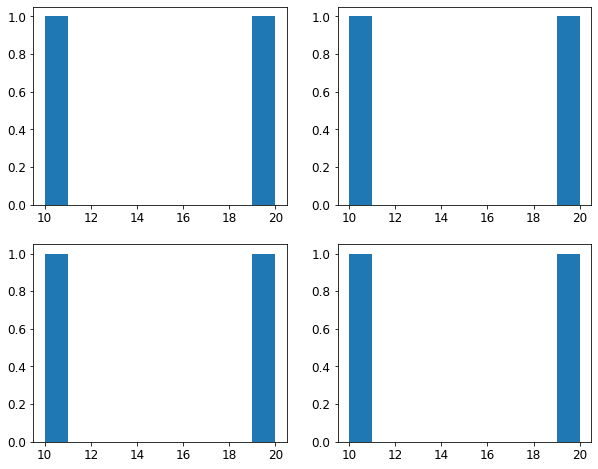

In [45]:
fig , ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(10,8))
ax = [ax1,ax2,ax3,ax4]
for axes, index in list(zip(ax,time_delta_df.index)):
    axes.hist([10,20])

<BarContainer object of 10 artists>

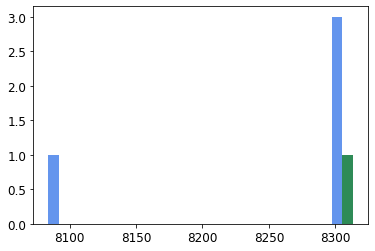

In [46]:
fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(time_delta_df['sensor'])
b_heights, b_bins = np.histogram(time_delta_df['scaner'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

In [50]:
time_delta_df['sensor'].

AttributeError: 'Series' object has no attribute 'bar'

In [48]:
time_delta_df

,sensor,scaner
0,8088,8335
1,8325,8340
2,8325,8325
3,8325,8332


In [49]:
ms.machines_id

{1: '11010401',
 2: '11030401',
 4: '12040401',
 5: '12060401',
 6: '13070401',
 11: '11011103',
 14: '12040001',
 15: '12050001',
 16: '13081101'}

<BarContainer object of 2 artists>

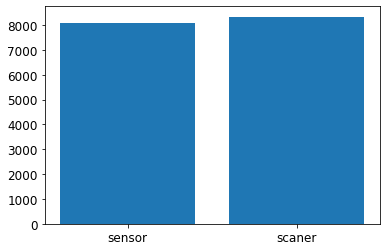

In [58]:
plt.bar(time_delta_df.columns, time_delta_df.iloc[0])

In [63]:
df1_sensors.values()

TypeError: 'numpy.ndarray' object is not callable